![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Foundations of Machine Learning Frameworks
&nbsp; 

CSCN8010 - Winter 2024
&nbsp; 

Professor: Ran Feldesh
&nbsp;

Student: Arcadio de Paula Fernandez


# Lab 9 is a continuation of lab 8. 



# Practical Lab 8 - fMNIST Classification with Dense Neural Networks (using Tensorflow)

## Importing all the essential libraries and sub modules

In [1]:
!pip install pandas



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# 1. Introduction: A brief introduction to the problem and obtaining the data.

###  1.1. A brief introduction to the problem

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms, MNIST dataset contains a lot of handwritten digits. It shares the same image size and structure of training and testing splits. The dataset Fashion-MNIST can be found on [Kaggle](https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/data?select=fashion-mnist_test.csv).

### 1.2. Obtaining the Data

In [3]:
# Load the data

data_train = pd.read_csv(r"C:\Users\arcad\CSCN8010-labs\Lab8-Arca\fashion-mnist_train.csv")
data_test = pd.read_csv(r"C:\Users\arcad\CSCN8010-labs\Lab8-Arca\fashion-mnist_test.csv")


In [4]:
# Extract labels and images
train_labels = data_train['label']
train_images = data_train.drop('label', axis=1)

test_labels = data_test['label']
test_images = data_test.drop('label', axis=1)

# 2. Exploratory data analysis - EDA

### 2.1. Type and quantitative information about the data set

In [5]:
# Convert DataFrames to NumPy arrays for dtype inspection and shape
train_images_np = train_images.to_numpy()
test_images_np = test_images.to_numpy()

print(f'Image DType: {type(train_images_np)}') # This will show the type of the variable holding the images
print(f'Image Element DType: {train_images_np.dtype}') # This will show the data type of an individual element in the image array
print(f'Label Element DType: {train_labels.dtype}') # This shows the data type of an individual label

print('\n**Shapes:**')
print('Train Data:')
print(f'Images: {train_images_np.shape}') # Shape of the image data array
print(f'Labels: {train_labels.shape}') # Shape of the labels
print('Test Data:')
print(f'Images: {test_images_np.shape}') # Shape of the test image data array
print(f'Labels: {test_labels.shape}') # Shape of the test labels

print('\nImage Data Range:')
print(f'Min: {train_images_np.min()}') # Minimum pixel value in the training set
print(f'Max: {train_images_np.max()}') # Maximum pixel value in the training set


Image DType: <class 'numpy.ndarray'>
Image Element DType: int64
Label Element DType: int64

**Shapes:**
Train Data:
Images: (60000, 784)
Labels: (60000,)
Test Data:
Images: (10000, 784)
Labels: (10000,)

Image Data Range:
Min: 0
Max: 255


### 2.2. Plotting the two first images of the dataset

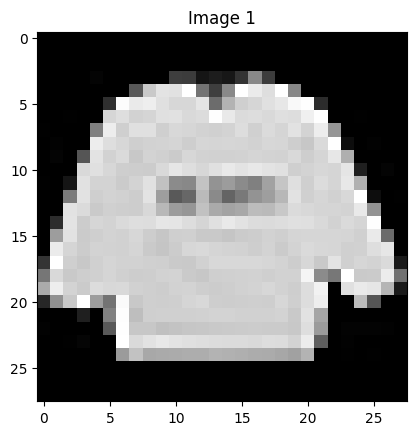

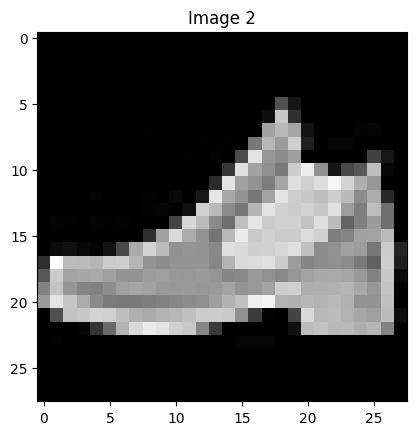

In [6]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(2): 
    image = train_images.iloc[i].to_numpy().reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.show()

In [7]:
# Convert the DataFrame to a numpy array 
X = train_images.to_numpy()  
y = train_labels.to_numpy()  


### 2.3. Visualization of the images in pixel data from grayscale 

In [8]:
def visualize_input(i, ax, y):
    img = X[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Digit no : {y[i]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(img[x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])

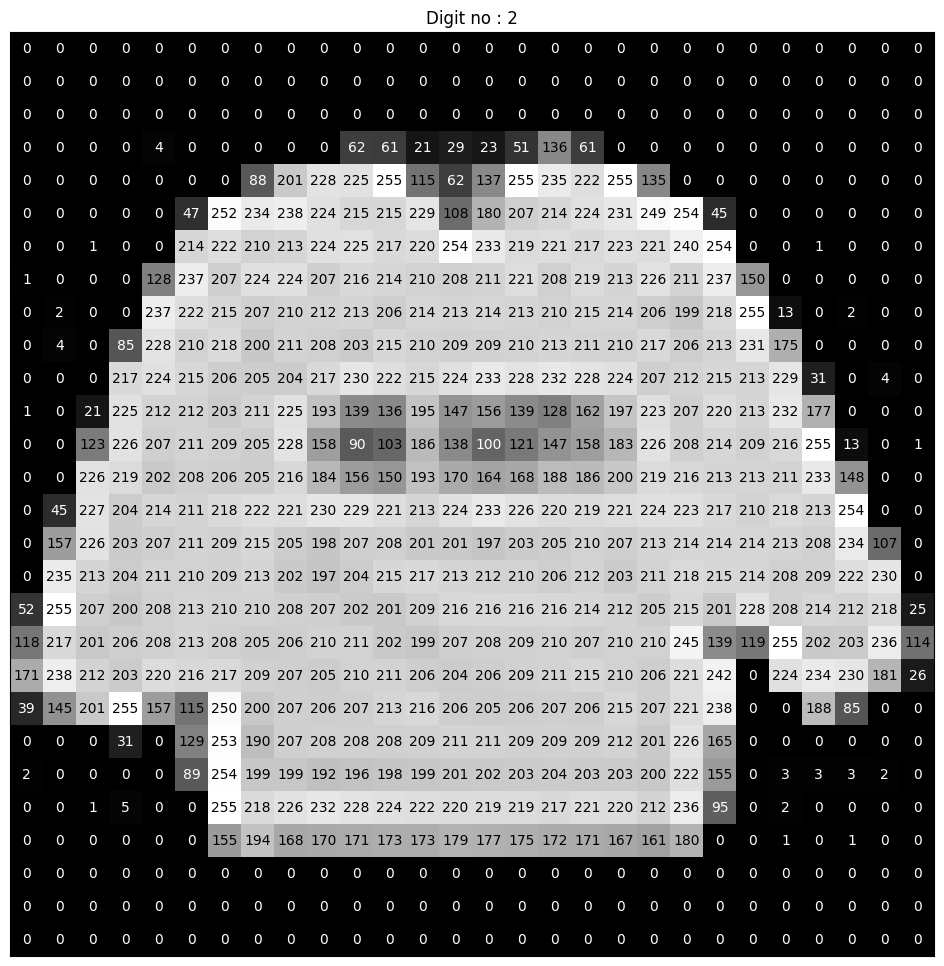

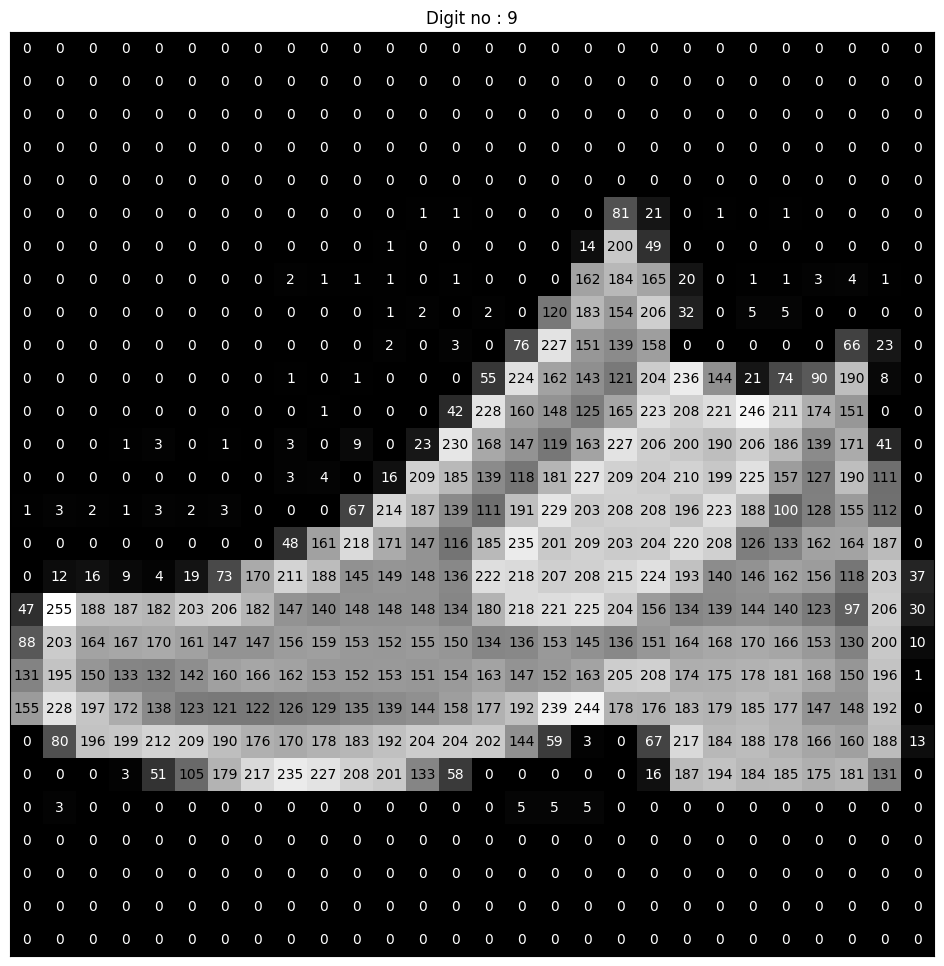

In [9]:
for i in range(2):  # Plot the first two images from the dataset
    fig, ax = plt.subplots(figsize=(12, 12))
    visualize_input(i, ax, y)  
    plt.show()



These images above are a visualization of pixel data from grayscale images, where each cell represents an individual pixel's intensity, ranging from 0 to 255. The numbers within the cells are the grayscale values—0 corresponds to black (no intensity), and 255 corresponds to white (full intensity).

### 2.4. The distribution of pixel values

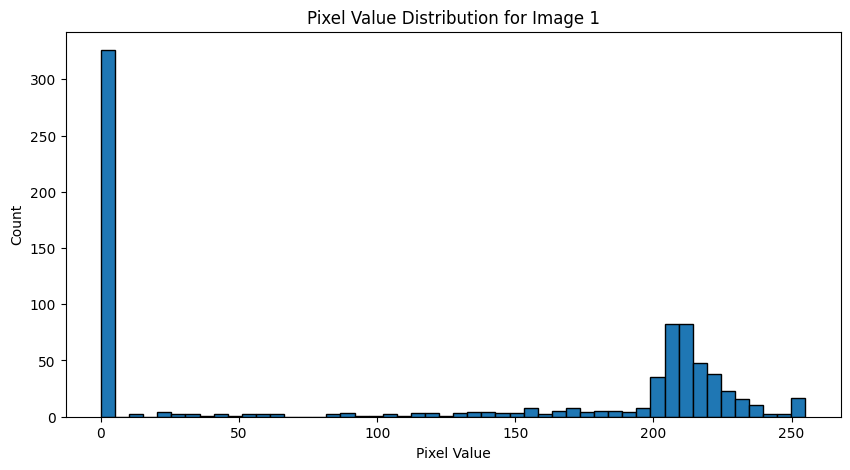

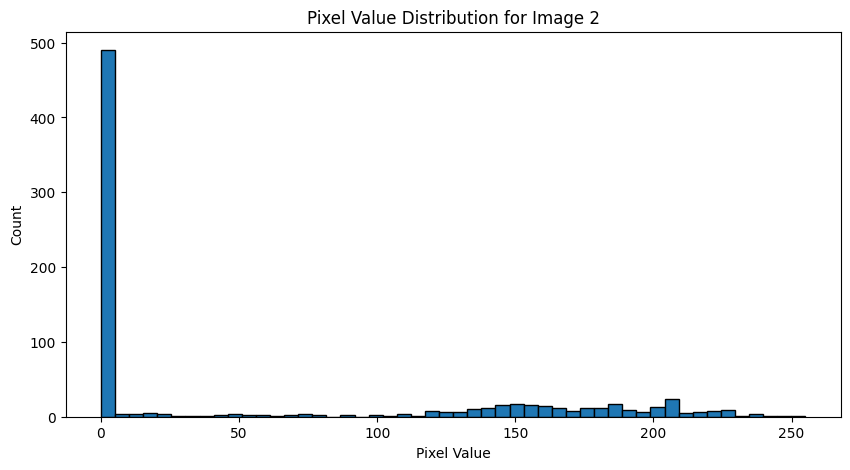

In [10]:
for i in range(2):  
   
    image = train_images.iloc[i].to_numpy().reshape(28, 28) 
    pixels = image.flatten() 

    # Plot the distribution of pixel values
    fig = plt.figure(figsize=(10, 5))
    plt.hist(pixels, bins=50, edgecolor='black')
    plt.title(f'Pixel Value Distribution for Image {i+1}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.show()


The histogram in the image represents the distribution of pixel values for the two images of the dataset and is useful for understanding the contrast and brightness of an image. 

The x-axis represents the pixel values ranging from 0 to 255. The value 0 corresponds to black, and 255 corresponds to white in a grayscale image.
The y-axis represents the count of pixels for each pixel value. In our two cases, many pixels have a value of 0, indicating a significant portion of the image is black, 

In image 1 the histogram also shows very few pixels with values close to 255, indicating few bright or white areas in the image.

In image 2 the histogram also shows very few pixels with values between 125 and 225, indicating fewer brightness areas.

### 2.5. Plotting with the average image for each label

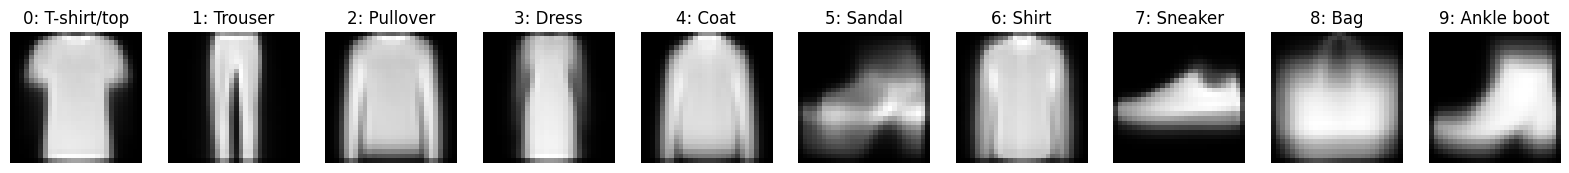

In [11]:
# Define the labels for the Fashion MNIST dataset
labels = {
    0: "0: T-shirt/top",
    1: "1: Trouser",
    2: "2: Pullover",
    3: "3: Dress",
    4: "4: Coat",
    5: "5: Sandal",
    6: "6: Shirt",
    7: "7: Sneaker",
    8: "8: Bag",
    9: "9: Ankle boot"
}

# Plot with the average image for each label
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y.astype('int8') == digit)[0]
    avg_image = np.mean(X[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(labels[digit])
    axes[digit].axis('off')
plt.show()

# 3. Preprocessing the Data

In [12]:
# Convert DataFrames to NumPy arrays
train_images_np = train_images.to_numpy()
test_images_np = test_images.to_numpy()

# Reshape the images
train_images_np = train_images_np.reshape((60000, 28 * 28))
test_images_np = test_images_np.reshape((10000, 28 * 28))

# Normalize the images
train_images_np = train_images_np.astype("float32") / 255
test_images_np = test_images_np.astype("float32") / 255


In [13]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# 4. Modeling

### 4.1. Choose a model: Define and Train a fully-connected feedforward neural network of your choice using Keras and Tensorflow. 

In our model we are going to use:
- A Dense layer ->  is a neural network layer where each neuron receives input from all the neurons of the previous layer, hence 'fully connected'.
- 512 ->  This is the number of neurons, or units, in this dense layer
- Relu ->  Rectified Linear Unit, which is the activation function used by all 512 neurons in this layer.
- In our case, the model expects each input to be a flat array of 784 elements (which likely corresponds to an image that's 28x28 pixels, flattened out).
- 10 ->  The number of neurons corresponds to the number of output classes
- The softmax activation function -> is used to convert the model's raw output scores into probabilities, so each neuron's output will have a probability ranging from 0 to 1. 

In [14]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Splitting the test set into validation and test sets (50% validation, 50% test)
validation_images, final_test_images, validation_labels, final_test_labels = train_test_split(
    test_images_np, test_labels, test_size=0.5, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu", input_shape=(784,)), # Make sure to update input_shape if needed
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with the training set and validate with the validation set you just created
history = model.fit(train_images_np, train_labels, epochs=30, validation_data=(validation_images, validation_labels))


# Creating a data frame and storing the metrics of the model 1
model_name = "Model 1: Model Lab 8"

# List to store metrics for each epoch
metrics_summary = []

# Extract metrics after training
for epoch in range(30):  
    epoch_metrics = {
        'Model': model_name,
        'Epoch': epoch + 1,
        'Loss': history.history['loss'][epoch],
        'Accuracy': history.history['accuracy'][epoch],
        'Validation Loss': history.history['val_loss'][epoch],
        'Validation Accuracy': history.history['val_accuracy'][epoch]
    }
    metrics_summary.append(epoch_metrics)

# Convert the list to a DataFrame for easier viewing and analysis
metrics_df = pd.DataFrame(metrics_summary)

# Print or save the DataFrame
metrics_df



Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4824 - accuracy: 0.8274 - val_loss: 0.3862 - val_accuracy: 0.8638
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3671 - accuracy: 0.8673 - val_loss: 0.3354 - val_accuracy: 0.8762
Epoch 3/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3275 - accuracy: 0.8799 - val_loss: 0.3428 - val_accuracy: 0.8810
Epoch 4/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3036 - accuracy: 0.8880 - val_loss: 0.3393 - val_accuracy: 0.8786
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2856 - accuracy: 0.8940 - val_loss: 0.3116 - val_accuracy: 0.8894
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2674 - accuracy: 0.9003 - val_loss: 0.3298 - val_accuracy: 0.8764
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2532 - accuracy: 0.9067 - val_loss: 0.3085 - val_accuracy:

,Model,Epoch,Loss,Accuracy,Validation Loss,Validation Accuracy
0,Model 1: Model Lab 8,1,0.482401,0.827350,0.386219,0.8638
1,Model 1: Model Lab 8,2,0.367097,0.867250,0.335402,0.8762
2,Model 1: Model Lab 8,3,0.327518,0.879867,0.342793,0.8810
3,Model 1: Model Lab 8,4,0.303583,0.888000,0.339325,0.8786
4,Model 1: Model Lab 8,5,0.285590,0.894017,0.311629,0.8894
5,Model 1: Model Lab 8,6,0.267397,0.900283,0.329812,0.8764
6,Model 1: Model Lab 8,7,0.253166,0.906683,0.308546,0.8870
7,Model 1: Model Lab 8,8,0.242920,0.908217,0.315177,0.8842
8,Model 1: Model Lab 8,9,0.233753,0.914017,0.322369,0.8866
9,Model 1: Model Lab 8,10,0.224206,0.914883,0.323893,0.8894


The training loss decreases over time, indicating that the model is learning and improving its performance on the training dataset.
The training accuracy increases over time, which is also a good sign that the model is learning.
The highest validation accuracy is reached at epoch 9 (89.18%).
There is a slight increase in validation loss after epoch 5, which might be an early sign of overfitting. 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Plot the training and validation loss and accuracy for modelo lab 8.

### Plotting the training and validation loss

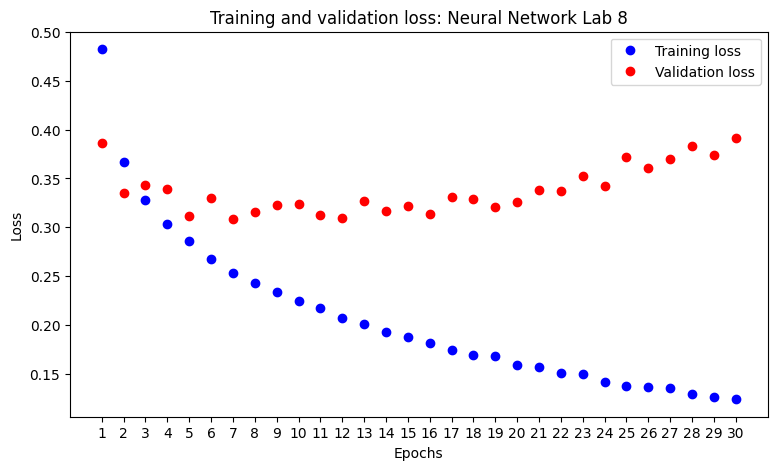

In [16]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 5))

# Extract loss values and validation loss values from the 'history' object
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

# Create a range for the number of epochs, adding 1 since the range starts at 0 otherwise
epochs = range(1, len(loss_values) + 1)

# Plot training loss in blue
plt.plot(epochs, loss_values, "bo", label="Training loss")

# Plot validation loss in red
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")

# Set x-axis label to 'Epochs' and ensure x-ticks correspond to the epoch numbers
plt.xlabel("Epochs")
plt.xticks(epochs)

# Set y-axis label to 'Loss'
plt.ylabel("Loss")

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title("Training and validation loss: Neural Network Lab 8")

# Display the plot
plt.show()

Overfitting is suggested by the validation loss, which decreases initially but starts to increase from around epoch 7 onwards, while the training loss continues to decrease, this shows a sign of overfitting.


##### Plotting the training and validation accuracy

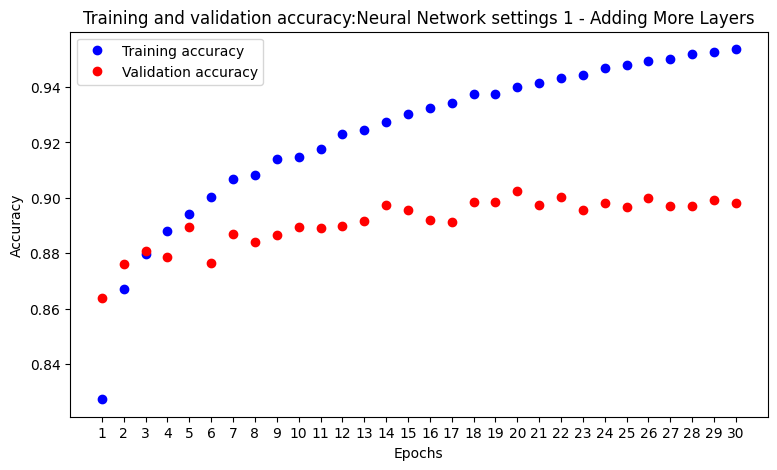

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 5))

# Extract accuracy values and validation accuracy values from the 'history' object
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

# Create a range for the number of epochs, adding 1 since the range starts at 0 otherwise
epochs = range(1, len(accuracy_values) + 1)

# Plot training accuracy in blue
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")

# Plot validation accuracy in red
plt.plot(epochs, val_accuracy_values, "ro", label="Validation accuracy")

# Set x-axis label to 'Epochs' and ensure x-ticks correspond to the epoch numbers
plt.xlabel("Epochs")
plt.xticks(epochs)

# Set y-axis label to 'Accuracy'
plt.ylabel("Accuracy")

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title("Training and validation accuracy:Neural Network settings 1 - Adding More Layers")

# Display the plot
plt.show()

In Neural Network settings 3: Reducing the Network Size in the loss graph, validation loss decreases until around epoch 10, then it starts to increase while the training loss continues to decrease. This is indicative of overfitting past epoch 10.

The accuracy graph shows that the validation accuracy increase up at epoch 15 and starts to plateau whereas the training accuracy continues to rise.

Analyzing the loss and accuracy graphs, the best set of weights would likely be around epoch 11, in others words best epoch to stop training and select the set of weights.

# 5. Evaluation

### 5.1. Evaluate the model using the validation dataset. (accuracy, precision, recall, F1). 

In [18]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on the validation dataset
validation_predictions = model.predict(validation_images)

# Convert predictions from one-hot encoded vectors to class labels
validation_predictions_labels = np.argmax(validation_predictions, axis=1)
validation_true_labels = np.argmax(validation_labels, axis=1)

# Evaluate the model on the validation dataset for accuracy directly using model.evaluate
validation_loss, validation_accuracy = model.evaluate(validation_images, validation_labels, verbose=0)

# Use scikit-learn to calculate precision, recall, and F1 score
report = classification_report(validation_true_labels, validation_predictions_labels, target_names=[f"Class {i}" for i in range(10)], output_dict=True)

# Extracting precision, recall, and F1 score for each class and the average (weighted)
print(f"Validation Accuracy: {validation_accuracy:.4f}")
for i, class_name in enumerate([f"Class {i}" for i in range(10)]):
    print(f"{class_name} - Precision: {report[class_name]['precision']:.4f}, Recall: {report[class_name]['recall']:.4f}, F1: {report[class_name]['f1-score']:.4f}")
print(f"Average (Weighted) - Precision: {report['weighted avg']['precision']:.4f}, Recall: {report['weighted avg']['recall']:.4f}, F1: {report['weighted avg']['f1-score']:.4f}")

# Alternatively, if you want to print out the overall scores directly:
print("\nOverall Evaluation Metrics:")
print(f"Accuracy: {validation_accuracy:.4f}")
print(f"Precision (Weighted Avg.): {report['weighted avg']['precision']:.4f}")
print(f"Recall (Weighted Avg.): {report['weighted avg']['recall']:.4f}")
print(f"F1-Score (Weighted Avg.): {report['weighted avg']['f1-score']:.4f}")



157/157 [==============================] - 0s 1ms/step
Validation Accuracy: 0.8982
Class 0 - Precision: 0.8164, Recall: 0.8752, F1: 0.8448
Class 1 - Precision: 0.9882, Recall: 0.9901, F1: 0.9892
Class 2 - Precision: 0.8538, Recall: 0.7856, F1: 0.8183
Class 3 - Precision: 0.9177, Recall: 0.8884, F1: 0.9028
Class 4 - Precision: 0.8173, Recall: 0.8930, F1: 0.8535
Class 5 - Precision: 0.9799, Recall: 0.9493, F1: 0.9644
Class 6 - Precision: 0.7516, Recall: 0.7146, F1: 0.7326
Class 7 - Precision: 0.9335, Recall: 0.9507, F1: 0.9420
Class 8 - Precision: 0.9776, Recall: 0.9756, F1: 0.9766
Class 9 - Precision: 0.9466, Recall: 0.9580, F1: 0.9523
Average (Weighted) - Precision: 0.8987, Recall: 0.8982, F1: 0.8979

Overall Evaluation Metrics:
Accuracy: 0.8982
Precision (Weighted Avg.): 0.8987
Recall (Weighted Avg.): 0.8982
F1-Score (Weighted Avg.): 0.8979


The report on the performance of your model on the validation dataset, shows us that the classes 1, 3, 5, 8 and 9 high precision and recall suggest the model performs well with these classes.Class 6 has the lowest precision and recall, indicating the model struggles with this category. 

The F1-score weighted average of 0.8871 is a harmonic mean of precision and recall and indicates overall balanced performance between the two metrics.

The average weighted precision is 0.8898, meaning when the model predicts any class, it is correct about 88.98% of the time. 

The model is quite accurate with an overall accuracy of 88.78. 

# 5.2. Run the model on the test set, and provide clear and relevant conclusions

In [19]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Make predictions on the final test set
predictions = model.predict(final_test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(final_test_labels, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Generate a classification report for precision, recall, and F1-score
report = classification_report(true_classes, predicted_classes)

print(f"Accuracy: {accuracy}")
print(report)


157/157 [==============================] - 0s 748us/step
Accuracy: 0.896
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       487
           1       0.99      0.98      0.98       493
           2       0.83      0.77      0.80       487
           3       0.90      0.91      0.91       498
           4       0.82      0.87      0.85       514
           5       0.98      0.95      0.97       487
           6       0.75      0.69      0.72       513
           7       0.94      0.97      0.95       513
           8       0.99      0.97      0.98       508
           9       0.96      0.96      0.96       500

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



The overall accuracy of the model on the test set is 0.891, which is high and suggests that the model is reliable in its predictions. Class 1 and 8 show exceptionally high performance across all metrics, suggesting that the model is particularly good at recognizing these items. Class 6  has the lowest F1-score, which is a harmonic mean of precision and recall. This implies that this class is the most challenging for the model. 

# 6. What if we wanted to increase the precision for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

![Precison and recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

Increasing the precision for class 5 without changing the model or retraining involves adjusting the decision threshold. By default, the threshold to a certain class is 0.5, so we are going to increase this threshold to 0.7.

Increasing the threshold will improve precision for class by reducing the number of false positives, it can also decrease the recall by failing to identify some true positives. 

In [20]:
import numpy as np

def adjust_predictions(predictions, class_index, new_threshold):
   
    adjusted_classes = np.argmax(predictions, axis=1)  # Get original class predictions
    class_probabilities = predictions[:, class_index]  # Probabilities for the specified class

    # Identify where adjustments are needed
    needs_adjustment = (class_probabilities >= new_threshold) & (adjusted_classes != class_index)

    # Apply adjustments
    adjusted_classes[needs_adjustment] = class_index

    return adjusted_classes

# Example usage
predictions = model.predict(final_test_images)  # Your model's predictions

# Adjust predictions for class '5' with a new, higher threshold, e.g., 0.7
new_threshold = 0.7
adjusted_classes = adjust_predictions(predictions, class_index=5, new_threshold=new_threshold)

# Evaluate the adjusted predictions
from sklearn.metrics import classification_report
true_classes = np.argmax(final_test_labels, axis=1)
print(classification_report(true_classes, adjusted_classes))


157/157 [==============================] - 0s 677us/step
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       487
           1       0.99      0.98      0.98       493
           2       0.83      0.77      0.80       487
           3       0.90      0.91      0.91       498
           4       0.82      0.87      0.85       514
           5       0.98      0.95      0.97       487
           6       0.75      0.69      0.72       513
           7       0.94      0.97      0.95       513
           8       0.99      0.97      0.98       508
           9       0.96      0.96      0.96       500

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



In the validation set class 5 precision is 0.9700 and now it increase to 0.99.

# 7. What if we wanted to increase the recall for class '5', how can we do that without changing the model or retraining? provide code that exemplifies this.

Increasing the reccal for class 5 without changing the model or retraining involves adjusting the decision threshold. By default, the threshold to a certain class is 0.5, so we are going to decrease this threshold to 0.3.

Decreasing the threshold will improve recall for class by increasing the false positive rate. 

In [21]:
import numpy as np

# Predictions from the model
predictions = model.predict(final_test_images)

# Original threshold: picking the class with the max probability
original_predicted_classes = np.argmax(predictions, axis=1)

# Adjusted threshold for class 5
class_5_threshold = 0.3  
adjusted_predicted_classes = np.copy(original_predicted_classes)

# Apply the adjusted threshold for class '5'
for i, prediction in enumerate(predictions):
    if prediction[5] > class_5_threshold:
        adjusted_predicted_classes[i] = 5  # Reassign to class '5' if above threshold

# Now, you can calculate the recall for class '5' as well as for other classes if needed
from sklearn.metrics import classification_report

true_classes = np.argmax(final_test_labels, axis=1)
adjusted_report = classification_report(true_classes, adjusted_predicted_classes, digits=3)

print("Adjusted Classification Report:")
print(adjusted_report)


157/157 [==============================] - 0s 663us/step
Adjusted Classification Report:
              precision    recall  f1-score   support

           0      0.802     0.899     0.848       487
           1      0.986     0.978     0.982       493
           2      0.834     0.766     0.799       487
           3      0.905     0.914     0.909       498
           4      0.824     0.868     0.845       514
           5      0.973     0.953     0.963       487
           6      0.749     0.694     0.721       513
           7      0.943     0.965     0.954       513
           8      0.986     0.969     0.977       508
           9      0.958     0.954     0.956       500

    accuracy                          0.896      5000
   macro avg      0.896     0.896     0.895      5000
weighted avg      0.896     0.896     0.895      5000



In the validation set class 5 recall is 0.9454 and now it increase to 0.965.

#  Practical  Lab 9 - Avoiding Overfitting by Saving a Model

## Step 3. Instead of just one neural network, explore 3 different neural networks (by changing any hyperparameter of your choice)

Changing a hyperparameter in the context of neural networks refers to modifying the settings of the training process and architecture of the network.

Common hyperparameters include:

1. Number of Layers

2. Number of Units in Layers

3. Learning Rate

4. Activation Functions (e.g., ReLU, sigmoid, tanh) -->  Functions that introduce non-linear properties to the network.

5. Batch Size -->  The number of training examples utilized in one iteration. 

6. Number of Epochs -->  The number of times the learning algorithm will work through the entire training dataset. 

7. Dropout Rate --> The fraction of the neurons are dropped out during training to prevent overfitting. 

8. Optimizer (e.g., SGD, Adam, RMSprop) --> The method or algorithm used to update weights in the network.

### Neural Network settings 1: Adding More Layers

In [22]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the Model and capture the history of training
history1 = model1.fit(train_images_np, train_labels, epochs=30, validation_data=(validation_images, validation_labels))


# Creating a data frame and storing the metrics of the model 1
model_name = "Model 1: Adding More Layers"

# List to store metrics for each epoch
metrics_summary1 = []

# Extract metrics after training
for epoch in range(30):  # Assuming 10 epochs as specified
    epoch_metrics = {
        'Model': model_name,
        'Epoch': epoch + 1,
        'Loss': history1.history['loss'][epoch],
        'Accuracy': history1.history['accuracy'][epoch],
        'Validation Loss': history1.history['val_loss'][epoch],
        'Validation Accuracy': history1.history['val_accuracy'][epoch]
    }
    metrics_summary1.append(epoch_metrics)

# Convert the list to a DataFrame for easier viewing and analysis
metrics_df1 = pd.DataFrame(metrics_summary1)

# Print or save the DataFrame
metrics_df1


Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4846 - accuracy: 0.8231 - val_loss: 0.3798 - val_accuracy: 0.8590
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3664 - accuracy: 0.8664 - val_loss: 0.3413 - val_accuracy: 0.8734
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3311 - accuracy: 0.8784 - val_loss: 0.3271 - val_accuracy: 0.8818
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3045 - accuracy: 0.8878 - val_loss: 0.3133 - val_accuracy: 0.8830
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2873 - accuracy: 0.8944 - val_loss: 0.3533 - val_accuracy: 0.8758
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2750 - accuracy: 0.8973 - val_loss: 0.3056 - val_accuracy: 0.8870
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2604 - accuracy: 0.9018 - val_loss: 0.3199 - val_accuracy:

,Model,Epoch,Loss,Accuracy,Validation Loss,Validation Accuracy
0,Model 1: Adding More Layers,1,0.484634,0.823150,0.379765,0.8590
1,Model 1: Adding More Layers,2,0.366377,0.866400,0.341263,0.8734
2,Model 1: Adding More Layers,3,0.331072,0.878400,0.327101,0.8818
3,Model 1: Adding More Layers,4,0.304506,0.887817,0.313345,0.8830
4,Model 1: Adding More Layers,5,0.287255,0.894367,0.353269,0.8758
5,Model 1: Adding More Layers,6,0.274979,0.897300,0.305597,0.8870
6,Model 1: Adding More Layers,7,0.260359,0.901750,0.319887,0.8848
7,Model 1: Adding More Layers,8,0.247418,0.906100,0.316137,0.8888
8,Model 1: Adding More Layers,9,0.239677,0.909317,0.293117,0.8966
9,Model 1: Adding More Layers,10,0.228888,0.913050,0.295375,0.8960


In [23]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


### Neural Network settings 2: Changing Activation Functions 

In [24]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="tanh", input_shape=(784,)),
    tf.keras.layers.Dense(256, activation="tanh"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Fit the Model and capture the history of training
history2 =model2.fit(train_images_np, train_labels, epochs=30, validation_data=(validation_images, validation_labels))

# Creating a data frame and storing the  metrics of the model 2

model_name = "Model 2: Changing Activation Functions"

# List to store metrics for each epoch
metrics_summary2 = []

# Extract metrics after training
for epoch in range(30): 
    epoch_metrics = {
        'Model': model_name,
        'Epoch': epoch + 1,
        'Loss': history2.history['loss'][epoch],
        'Accuracy': history2.history['accuracy'][epoch],
        'Validation Loss': history2.history['val_loss'][epoch],
        'Validation Accuracy': history2.history['val_accuracy'][epoch]
    }
    metrics_summary2.append(epoch_metrics)

# Convert the list to a DataFrame for easier viewing and analysis
metrics_df2 = pd.DataFrame(metrics_summary2)

# Print or save the DataFrame
metrics_df2

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4805 - accuracy: 0.8249 - val_loss: 0.4352 - val_accuracy: 0.8474
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3755 - accuracy: 0.8602 - val_loss: 0.3787 - val_accuracy: 0.8662
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3480 - accuracy: 0.8716 - val_loss: 0.3815 - val_accuracy: 0.8652
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3299 - accuracy: 0.8779 - val_loss: 0.3356 - val_accuracy: 0.8802
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3153 - accuracy: 0.8822 - val_loss: 0.3415 - val_accuracy: 0.8688
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3083 - accuracy: 0.8857 - val_loss: 0.3308 - val_accuracy: 0.8750
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.8899 - val_loss: 0.3635 - val_accuracy:

,Model,Epoch,Loss,Accuracy,Validation Loss,Validation Accuracy
0,Model 2: Changing Activation Functions,1,0.480471,0.824917,0.435192,0.8474
1,Model 2: Changing Activation Functions,2,0.375527,0.860250,0.378746,0.8662
2,Model 2: Changing Activation Functions,3,0.348006,0.871583,0.381541,0.8652
3,Model 2: Changing Activation Functions,4,0.329931,0.877900,0.335564,0.8802
4,Model 2: Changing Activation Functions,5,0.315337,0.882217,0.341545,0.8688
5,Model 2: Changing Activation Functions,6,0.308291,0.885700,0.330810,0.8750
6,Model 2: Changing Activation Functions,7,0.297003,0.889900,0.363493,0.8668
7,Model 2: Changing Activation Functions,8,0.296148,0.890817,0.329543,0.8826
8,Model 2: Changing Activation Functions,9,0.287616,0.893900,0.358793,0.8698
9,Model 2: Changing Activation Functions,10,0.285233,0.893900,0.328251,0.8786


In [25]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### Neural Network settings 3: Reducing the Network Size

In [26]:
import pandas as pd


model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(10, activation="softmax")
])

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Fit the Model and capture the history of training
history3 = model3.fit(train_images_np, train_labels, epochs=30, validation_data=(validation_images, validation_labels))

# Creating a data frame and storing the  metrics of the model 3

model_name = "Model 3: Reduced Size"

# List to store metrics for each epoch
metrics_summary3 = []

# Extract metrics after training
for epoch in range(30):  # Assuming 30 epochs as specified
    epoch_metrics = {
        'Model': model_name,
        'Epoch': epoch + 1,
        'Loss': history3.history['loss'][epoch],
        'Accuracy': history3.history['accuracy'][epoch],
        'Validation Loss': history3.history['val_loss'][epoch],
        'Validation Accuracy': history3.history['val_accuracy'][epoch]
    }
    metrics_summary3.append(epoch_metrics)

# Convert the list to a DataFrame for easier viewing and analysis
metrics_df3 = pd.DataFrame(metrics_summary3)

# Print or save the DataFrame
metrics_df3


Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4901 - accuracy: 0.8271 - val_loss: 0.3853 - val_accuracy: 0.8650
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3686 - accuracy: 0.8655 - val_loss: 0.3540 - val_accuracy: 0.8716
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3326 - accuracy: 0.8790 - val_loss: 0.3336 - val_accuracy: 0.8806
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3060 - accuracy: 0.8876 - val_loss: 0.3244 - val_accuracy: 0.8842
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2888 - accuracy: 0.8931 - val_loss: 0.3186 - val_accuracy: 0.8806
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.8984 - val_loss: 0.3136 - val_accuracy: 0.8888
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2597 - accuracy: 0.9031 - val_loss: 0.3183 - val_accuracy:

,Model,Epoch,Loss,Accuracy,Validation Loss,Validation Accuracy
0,Model 3: Reduced Size,1,0.490104,0.827150,0.385305,0.8650
1,Model 3: Reduced Size,2,0.368648,0.865517,0.353976,0.8716
2,Model 3: Reduced Size,3,0.332637,0.879033,0.333619,0.8806
3,Model 3: Reduced Size,4,0.305994,0.887600,0.324389,0.8842
4,Model 3: Reduced Size,5,0.288812,0.893067,0.318566,0.8806
5,Model 3: Reduced Size,6,0.273314,0.898350,0.313599,0.8888
6,Model 3: Reduced Size,7,0.259657,0.903083,0.318274,0.8864
7,Model 3: Reduced Size,8,0.250142,0.906817,0.307929,0.8898
8,Model 3: Reduced Size,9,0.238368,0.911000,0.321701,0.8820
9,Model 3: Reduced Size,10,0.230891,0.913900,0.297404,0.8922


In [27]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Neural Network settings 1: Adding More Layers

### Step 3.1. Plot the training and validation loss and accuracy for each one of them.

##### Plotting the training and validation loss

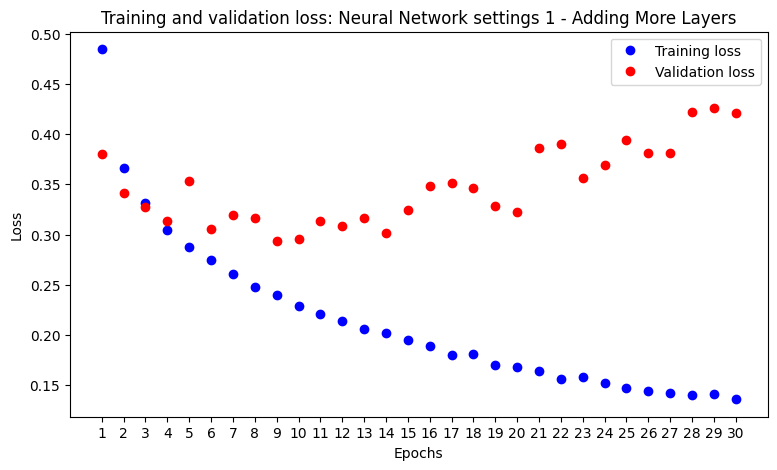

In [28]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 5))

# Extract loss values and validation loss values from the 'history1' object
loss_values = history1.history['loss']
val_loss_values = history1.history['val_loss']

# Create a range for the number of epochs, adding 1 since the range starts at 0 otherwise
epochs = range(1, len(loss_values) + 1)

# Plot training loss in blue
plt.plot(epochs, loss_values, "bo", label="Training loss")

# Plot validation loss in red
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")

# Set x-axis label to 'Epochs' and ensure x-ticks correspond to the epoch numbers
plt.xlabel("Epochs")
plt.xticks(epochs)

# Set y-axis label to 'Loss'
plt.ylabel("Loss")

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title("Training and validation loss: Neural Network settings 1 - Adding More Layers")

# Display the plot
plt.show()

##### Plotting the training and validation accuracy

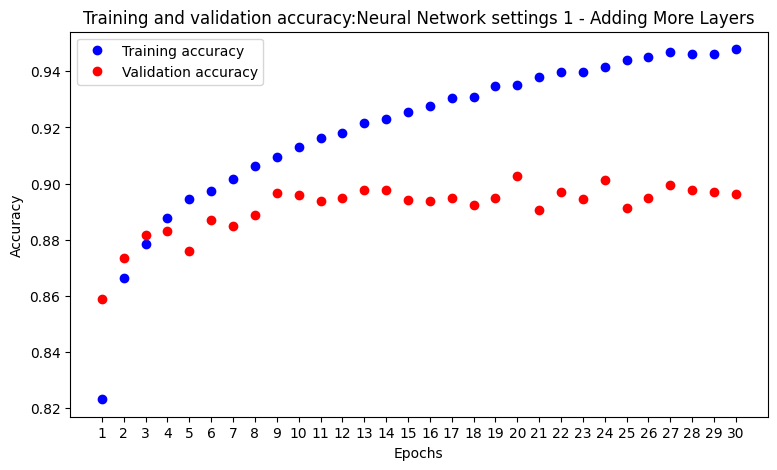

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

# Extract accuracy values and validation accuracy values from the 'history1' object
accuracy_values = history1.history['accuracy']
val_accuracy_values = history1.history['val_accuracy']

# Create a range for the number of epochs, adding 1 since the range starts at 0 otherwise
epochs = range(1, len(accuracy_values) + 1)

# Plot training accuracy in blue
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")

# Plot validation accuracy in red
plt.plot(epochs, val_accuracy_values, "ro", label="Validation accuracy")

# Set x-axis label to 'Epochs' and ensure x-ticks correspond to the epoch numbers
plt.xlabel("Epochs")
plt.xticks(epochs)

# Set y-axis label to 'Accuracy'
plt.ylabel("Accuracy")

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title("Training and validation accuracy:Neural Network settings 1 - Adding More Layers")

# Display the plot
plt.show()

### Step 3.2. Identify the best set of weights based on the graphs or additional considerations where the main purpose is to avoid over-fitting. Use the same reasoning as presented in class (Week 10, Class 2) - which is based on choosing the 'right' epoch.

In Neural Network settings 1 - Adding More Layers in the loss graph, the model's training loss keeps decreasing and that is good, however, the validation loss starts to increase after a certain number of epochs, which is a sign of overfitting. We want to choose a point just before the validation loss starts to increase constantly. This happens at epoch 15 or 16.


The validation accuracy seems to be steady while the training accuracy continues to increase. This is another sign of overfitting, and  this seems to occur around epoch 15 or 16

Considering both graphs, the best epoch to stop training and select the set of weights seems to be around epoch 15 or 16, as this is the point where validation loss is still low and validation accuracy gets steady. 

## Neural Network settings 2: Changing Activation Functions

### Step 3.1. Plot the training and validation loss and accuracy for each one of them.

##### Plotting the training and validation loss

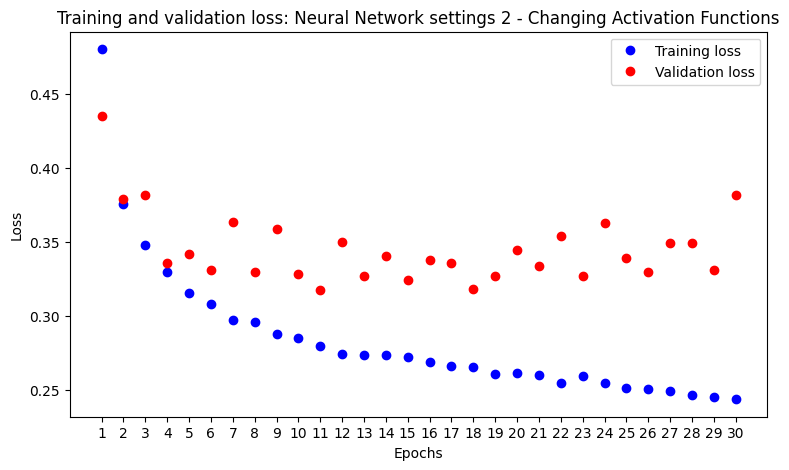

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 5))

# Extract loss values and validation loss values from the 'history2' object
loss_values = history2.history['loss']
val_loss_values = history2.history['val_loss']

# Create a range for the number of epochs, adding 1 since the range starts at 0 otherwise
epochs = range(1, len(loss_values) + 1)

# Plot training loss in blue
plt.plot(epochs, loss_values, "bo", label="Training loss")

# Plot validation loss in red
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")

# Set x-axis label to 'Epochs' and ensure x-ticks correspond to the epoch numbers
plt.xlabel("Epochs")
plt.xticks(epochs)

# Set y-axis label to 'Loss'
plt.ylabel("Loss")

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title("Training and validation loss: Neural Network settings 2 - Changing Activation Functions")

# Display the plot
plt.show()

##### Plotting the training and validation accuracy

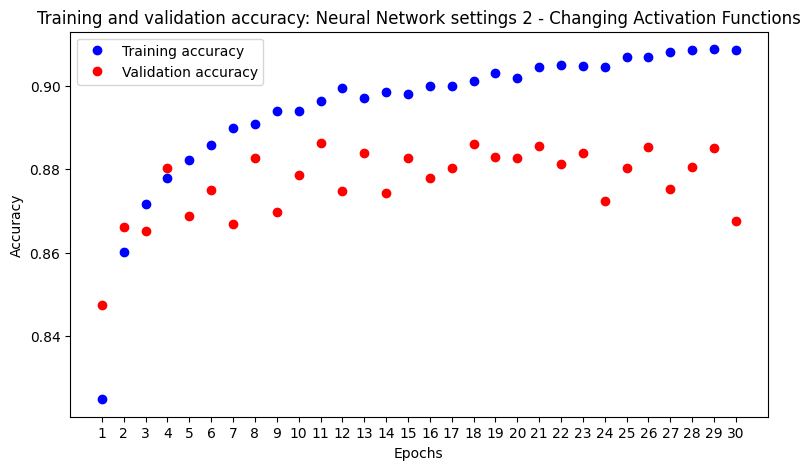

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 5))

# Extract accuracy values and validation accuracy values from the 'history2' object
accuracy_values = history2.history['accuracy']
val_accuracy_values = history2.history['val_accuracy']

# Create a range for the number of epochs, adding 1 since the range starts at 0 otherwise
epochs = range(1, len(accuracy_values) + 1)

# Plot training accuracy in blue
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")

# Plot validation accuracy in red
plt.plot(epochs, val_accuracy_values, "ro", label="Validation accuracy")

# Set x-axis label to 'Epochs' and ensure x-ticks correspond to the epoch numbers
plt.xlabel("Epochs")
plt.xticks(epochs)

# Set y-axis label to 'Accuracy'
plt.ylabel("Accuracy")

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title("Training and validation accuracy: Neural Network settings 2 - Changing Activation Functions")

# Display the plot
plt.show()

### Step 3.2. Identify the best set of weights based on the graphs or additional considerations where the main purpose is to avoid over-fitting. Use the same reasoning as presented in class (Week 10, Class 2) - which is based on choosing the 'right' epoch.

In Neural Network settings 2: Changing Activation Functions in the loss graph, the best point would be right before the validation loss starts to increase significantly. In this graph, the validation loss seems to start increasing after epoch 14.

he best epoch in terms of validation accuracy would be at the peak just before or where it begins to plateau, which looks to be around epoch 13.

Considering both the loss and accuracy graphs together, epoch 13 seems to be the optimal stopping point before overfitting becomes significant.

## Neural Network settings 3: Reducing the Network Size

### Step 3.1. Plot the training and validation loss and accuracy for each one of them.

##### Plotting the training and validation loss

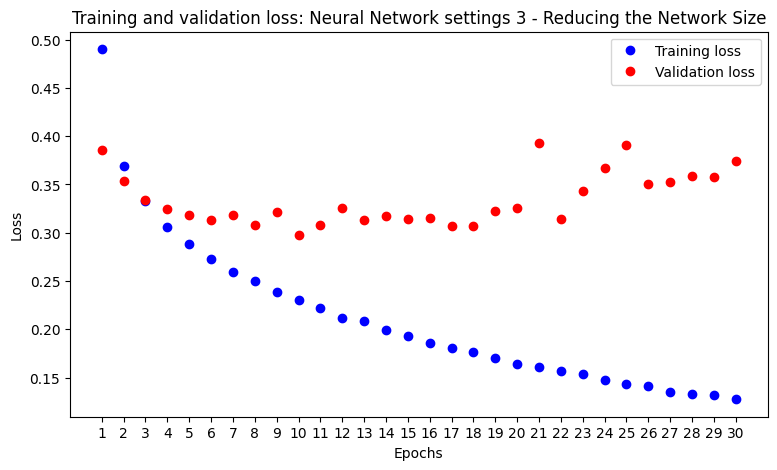

In [32]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 5))

# Extract loss values and validation loss values from the 'history3' object
loss_values = history3.history['loss']
val_loss_values = history3.history['val_loss']

# Create a range for the number of epochs, adding 1 since the range starts at 0 otherwise
epochs = range(1, len(loss_values) + 1)

# Plot training loss in blue
plt.plot(epochs, loss_values, "bo", label="Training loss")

# Plot validation loss in red
plt.plot(epochs, val_loss_values, "ro", label="Validation loss")

# Set x-axis label to 'Epochs' and ensure x-ticks correspond to the epoch numbers
plt.xlabel("Epochs")
plt.xticks(epochs)

# Set y-axis label to 'Loss'
plt.ylabel("Loss")

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title("Training and validation loss: Neural Network settings 3 - Reducing the Network Size")

# Display the plot
plt.show()


##### Plotting the training and validation accuracy

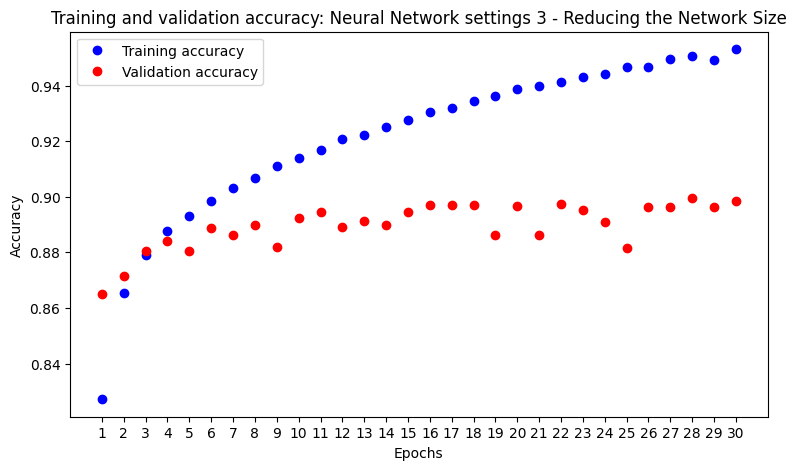

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))

# Extract accuracy values and validation accuracy values from the 'history3' object
accuracy_values = history3.history['accuracy']
val_accuracy_values = history3.history['val_accuracy']

# Create a range for the number of epochs, adding 1 since the range starts at 0 otherwise
epochs = range(1, len(accuracy_values) + 1)

# Plot training accuracy in blue
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")

# Plot validation accuracy in red
plt.plot(epochs, val_accuracy_values, "ro", label="Validation accuracy")

# Set x-axis label to 'Epochs' and ensure x-ticks correspond to the epoch numbers
plt.xlabel("Epochs")
plt.xticks(epochs)

# Set y-axis label to 'Accuracy'
plt.ylabel("Accuracy")

# Add a legend to the plot
plt.legend()

# Set the title of the plot
plt.title("Training and validation accuracy: Neural Network settings 3 - Reducing the Network Size")

# Display the plot
plt.show()


### Step 3.2. For each of the 3 identify the best set of weights based on the graphs or additional considerations where the main purpose is to avoid over-fitting. Use the same reasoning as presented in class (Week 10, Class 2) - which is based on choosing the 'right' epoch.

In Neural Network settings 3: Reducing the Network Size in the loss graph, validation loss decreases until around epoch 10, then it starts to increase while the training loss continues to decrease. This is indicative of overfitting past epoch 10.

The accuracy graph shows that the validation accuracy increase up at epoch 10 and starts to plateau whereas the training accuracy continues to rise.

Analyzing the loss and accuracy graphs, the best set of weights would likely be around epoch 10, in others words best epoch to stop training and select the set of weights.

## Step 3.3. As always: summarize your reasoning clearly (table, insights, clear English statements). Clear and good analysis is important. This is evaluate by the depth of you insights, and the clarity of presentation.

In [34]:
import pandas as pd

# Assuming metrics_df1, metrics_df2, and metrics_df3 are your DataFrames

# Get the last 3 rows from each DataFrame
last_three_rows_df1 = metrics_df1.tail(3)
last_three_rows_df2 = metrics_df2.tail(3)
last_three_rows_df3 = metrics_df3.tail(3)

# Concatenate the last 3 rows of each DataFrame into one
combined_df = pd.concat([last_three_rows_df1, last_three_rows_df2, last_three_rows_df3])

# Display the combined DataFrame
combined_df


,Model,Epoch,Loss,Accuracy,Validation Loss,Validation Accuracy
27,Model 1: Adding More Layers,28,0.140225,0.946200,0.422579,0.8976
28,Model 1: Adding More Layers,29,0.141539,0.946133,0.425966,0.8970
29,Model 1: Adding More Layers,30,0.135961,0.947850,0.421235,0.8962
27,Model 2: Changing Activation Functions,28,0.246112,0.908583,0.349351,0.8806
28,Model 2: Changing Activation Functions,29,0.245130,0.908750,0.331293,0.8850
29,Model 2: Changing Activation Functions,30,0.243533,0.908617,0.381974,0.8676
27,Model 3: Reduced Size,28,0.132743,0.950717,0.358990,0.8996
28,Model 3: Reduced Size,29,0.132289,0.949117,0.357793,0.8962
29,Model 3: Reduced Size,30,0.127615,0.953067,0.374582,0.8986




The table data above shows that tModel 3 (Reduced Size) is the best model among the three at epoch 30. It has a low training and validation loss and the highest training (0.952983) and validation accuracy and has the lowest training loss 0.125984, this training loss of is an indication of strong performance, 


And  the comparative Analysis of the graphs:

In model 1 (Adding More Layers) overfitting seems to be around epoch 15, but it soars after it.
In model 2 (Changing Activation Functions) the model starts to overfit after about epoch 13, but less severely than in model 1 but has a lot of peaks.

In model 3 (Reduced Size), the model does sign of overfitting slightly in epoch 10 both loss and accuracy curves stabilize.
Considering overfitting, Model 3 (Reducing the Network Size) appears to be the best among the three. It shows the least sign of overfitting, as the validation loss does not increase significantly and the validation accuracy does not drop or diverge too much from the training accuracy even after many epochs.

Given the table data and the 6 graphs analysis, we can say that Model 3 (Reduced Size) is the best model among the three. 

## Step 4. With the best model chosen above, and using its best weights as found above, run the evaluation as requested in lab 8.

###  For Model 3 (Reduced Size): Evaluate the model using the validation dataset. (accuracy, precision, recall, F1).

#### Step 4.1. Running Model 3 (Reduced Size) with 30 epochs

In [35]:

# Predict on the validation dataset
validation_predictions = model3.predict(validation_images)

# Convert predictions from one-hot encoded vectors to class labels
validation_predictions_labels = np.argmax(validation_predictions, axis=1)
validation_true_labels = np.argmax(validation_labels, axis=1)

# Evaluate the model on the validation dataset directly for accuracy
validation_loss, validation_accuracy = model3.evaluate(validation_images, validation_labels, verbose=0)

# Use scikit-learn to calculate precision, recall, and F1 score
report = classification_report(validation_true_labels, validation_predictions_labels, 
                               target_names=[f"Class {i}" for i in range(10)], 
                               output_dict=True)

# Extracting precision, recall, and F1 score for each class and the average (weighted)
print(f"Validation Accuracy: {validation_accuracy:.4f}")
for i, class_name in enumerate([f"Class {i}" for i in range(10)]):
    print(f"{class_name} - Precision: {report[class_name]['precision']:.4f}, "
          f"Recall: {report[class_name]['recall']:.4f}, "
          f"F1: {report[class_name]['f1-score']:.4f}")
print(f"Average (Weighted) - Precision: {report['weighted avg']['precision']:.4f}, "
      f"Recall: {report['weighted avg']['recall']:.4f}, "
      f"F1: {report['weighted avg']['f1-score']:.4f}")

# Print out the overall scores directly:
print("\nOverall Evaluation Metrics:")
print(f"Accuracy: {validation_accuracy:.4f}")
print(f"Precision (Weighted Avg.): {report['weighted avg']['precision']:.4f}")
print(f"Recall (Weighted Avg.): {report['weighted avg']['recall']:.4f}")
print(f"F1-Score (Weighted Avg.): {report['weighted avg']['f1-score']:.4f}")


157/157 [==============================] - 0s 789us/step
Validation Accuracy: 0.8986
Class 0 - Precision: 0.8734, Recall: 0.8070, F1: 0.8389
Class 1 - Precision: 0.9749, Recall: 0.9941, F1: 0.9844
Class 2 - Precision: 0.8112, Recall: 0.8207, F1: 0.8159
Class 3 - Precision: 0.9358, Recall: 0.9004, F1: 0.9178
Class 4 - Precision: 0.8484, Recall: 0.8519, F1: 0.8501
Class 5 - Precision: 0.9819, Recall: 0.9532, F1: 0.9674
Class 6 - Precision: 0.7078, Recall: 0.7659, F1: 0.7357
Class 7 - Precision: 0.9263, Recall: 0.9548, F1: 0.9403
Class 8 - Precision: 0.9816, Recall: 0.9776, F1: 0.9796
Class 9 - Precision: 0.9562, Recall: 0.9600, F1: 0.9581
Average (Weighted) - Precision: 0.9002, Recall: 0.8986, F1: 0.8991

Overall Evaluation Metrics:
Accuracy: 0.8986
Precision (Weighted Avg.): 0.9002
Recall (Weighted Avg.): 0.8986
F1-Score (Weighted Avg.): 0.8991


The report on the performance of your model on the validation dataset, shows us that the classes 1, 5, 8 and 9 high precision and recall suggest the model performs well with these classes.Class 6 has the lowest precision and recall, indicating the model struggles with this category. 

The F1-score weighted average of 0.8871 is a harmonic mean of precision and recall and indicates overall balanced performance between the two metrics.

The average weighted precision is 0.9002, meaning when the model predicts any class, it is correct about 90.002% of the time. 

The model is quite accurate with an overall accuracy of 0.8988. 



#### Step 4.2. Running Model 3 (Reduced Size) with 10 epochs

In model 3 (Reduced Size), the model does sign of overfitting slightly in epoch 10 both loss and accuracy curves stabilize, ( so the best set of weights would likely be around epoch 10) in other words, the best epoch to stop training and select the set of weights, so we are running with 10 epochs instead of 30 form the code above.

In [36]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report


# Define the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Fit the Model and capture the history of training to 10 epochs as 
history3 = model3.fit(train_images_np, train_labels, epochs=10, validation_data=(validation_images, validation_labels))

# Predict on the validation dataset
validation_predictions = model3.predict(validation_images)

# Convert predictions from one-hot encoded vectors to class labels
validation_predictions_labels = np.argmax(validation_predictions, axis=1)
validation_true_labels = np.argmax(validation_labels, axis=1)

# Evaluate the model on the validation dataset directly for accuracy
validation_loss, validation_accuracy = model3.evaluate(validation_images, validation_labels, verbose=0)

# Use scikit-learn to calculate precision, recall, and F1 score
report = classification_report(validation_true_labels, validation_predictions_labels, 
                               target_names=[f"Class {i}" for i in range(10)], 
                               output_dict=True)

# Extracting precision, recall, and F1 score for each class and the average (weighted)
print(f"Validation Accuracy: {validation_accuracy:.4f}")
for i, class_name in enumerate([f"Class {i}" for i in range(10)]):
    print(f"{class_name} - Precision: {report[class_name]['precision']:.4f}, "
          f"Recall: {report[class_name]['recall']:.4f}, "
          f"F1: {report[class_name]['f1-score']:.4f}")
print(f"Average (Weighted) - Precision: {report['weighted avg']['precision']:.4f}, "
      f"Recall: {report['weighted avg']['recall']:.4f}, "
      f"F1: {report['weighted avg']['f1-score']:.4f}")

# Print out the overall scores directly:
print("\nOverall Evaluation Metrics:")
print(f"Accuracy: {validation_accuracy:.4f}")
print(f"Precision (Weighted Avg.): {report['weighted avg']['precision']:.4f}")
print(f"Recall (Weighted Avg.): {report['weighted avg']['recall']:.4f}")
print(f"F1-Score (Weighted Avg.): {report['weighted avg']['f1-score']:.4f}")


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4852 - accuracy: 0.8274 - val_loss: 0.4126 - val_accuracy: 0.8556
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3722 - accuracy: 0.8657 - val_loss: 0.3480 - val_accuracy: 0.8720
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3330 - accuracy: 0.8780 - val_loss: 0.3470 - val_accuracy: 0.8748
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3071 - accuracy: 0.8879 - val_loss: 0.3385 - val_accuracy: 0.8746
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2883 - accuracy: 0.8936 - val_loss: 0.3039 - val_accuracy: 0.8874
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2710 - accuracy: 0.8992 - val_loss: 0.3056 - val_accuracy: 0.8900
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2593 - accuracy: 0.9026 - val_loss: 0.3005 - val_accuracy:

By running 10 epochs instead of 30 we got a worse result, this shows us the best epoch to stop training and select the set of weights is not 10, but a higher epoch. 